In [9]:
import os

from trixi.util import Config


def get_config():
    # Set your own path, if needed.
    #data_root_dir = os.path.abspath('data')  # The path where the downloaded dataset is stored.
    data_root_dir = "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset"
    c = Config(
        update_from_argv=True,
        # Train parameters
        num_classes=3,
        in_channels=1,
        batch_size=8,
        patch_size=64,
        n_epochs=50,
        learning_rate=0.0002,
        fold=0,  # The 'splits.pkl' may contain multiple folds. Here we choose which one we want to use.

        device="cuda",  # 'cuda' is the default CUDA device, you can use also 'cpu'. For more information, see https://pytorch.org/docs/stable/notes/cuda.html

        # Logging parameters
        name='Basic_Unet',
        plot_freq=10,  # How often should stuff be shown in visdom
        append_rnd_string=False,
        start_visdom=True,

        do_instancenorm=True,  # Defines whether or not the UNet does a instance normalization in the contracting path
        do_load_checkpoint=False,
        checkpoint_dir='',

        # Adapt to your own path, if needed.
        google_drive_id='1RzPB1_bqzQhlWvU-YGvZzhx2omcDh38C',
        dataset_name='Task01_Hippocampus',
        base_dir=os.path.abspath('output_experiment'),  # Where to log the output of the experiment.

        data_root_dir=data_root_dir,  # The path where the downloaded dataset is stored.
        data_dir=os.path.join(data_root_dir, 'Task01_Hippocampus','imagesTr'),  # This is where your training and validation data is stored
       
        data_test_dir=os.path.join(data_root_dir, 'Task04_Hippocampus/preprocessed'),  # This is where your test data is stored

        split_dir= os.path.join(data_root_dir, 'Task01_Hippocampus'),  # This is where the 'splits.pkl' file is located, that holds your splits.
    )

    print(c)
    return c


In [2]:
def subfiles(folder, join=True, prefix=None, suffix=None, sort=True):
    if join:
        l = os.path.join
    else:
        l = lambda x, y: y
    res = [l(folder, i) for i in os.listdir(folder) if os.path.isfile(os.path.join(folder, i))
            and (prefix is None or i.startswith(prefix))
            and (suffix is None or i.endswith(suffix))]
    if sort:
        res.sort()
    return res

In [10]:
import pickle
#from utilities.file_and_folder_operations import subfiles

import os
import numpy as np


def create_splits(output_dir, image_dir):
    png_files = subfiles(image_dir, suffix=".png", join=False)

    trainset_size = len(png_files)*50//100
    valset_size = len(png_files)*25//100
    testset_size = len(png_files)*25//100

    splits = []
    for split in range(0, 5):
        image_list = png_files.copy()
        trainset = []
        valset = []
        testset = []
        for i in range(0, trainset_size):
            patient = np.random.choice(image_list)
            image_list.remove(patient)
            trainset.append(patient[:-4])
        for i in range(0, valset_size):
            patient = np.random.choice(image_list)
            image_list.remove(patient)
            valset.append(patient[:-4])
        for i in range(0, testset_size):
            patient = np.random.choice(image_list)
            image_list.remove(patient)
            testset.append(patient[:-4])
        split_dict = dict()
        split_dict['train'] = trainset
        split_dict['val'] = valset
        split_dict['test'] = testset

        splits.append(split_dict)

    with open(os.path.join(output_dir, 'splits.pkl'), 'wb') as f:
        pickle.dump(splits, f)

In [11]:
c = get_config()

create_splits(output_dir=c.split_dir, image_dir=c.data_dir)

{
    "append_rnd_string": false,
    "base_dir": "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/output_experiment",
    "batch_size": 8,
    "checkpoint_dir": "",
    "data_dir": "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus/imagesTr",
    "data_root_dir": "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset",
    "data_test_dir": "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task04_Hippocampus/preprocessed",
    "dataset_name": "Task01_Hippocampus",
    "device": "cuda",
    "do_instancenorm": true,
    "do_load_checkpoint": false,
    "fold": 0,
    "google_drive_id": "1RzPB1_bqzQhlWvU-YGvZzhx2omcDh38C",
    "in_channels": 1,
    "learning_rate": 0.0002,
    "n_epochs": 50,
    "name": "Basic_Unet",
    "num_classes": 3,
    "patch_size": 64,
    "plot_freq": 10,
    "split_dir": "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocam

In [12]:
path = "/home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus/splits.pkl"
import pickle
pickle_in = open(path,"rb")
example_dict = pickle.load(pickle_in)
print(example_dict)

[{'train': ['hippocampus_001_0014', 'hippocampus_001_0027', 'hippocampus_001_0034', 'hippocampus_001_0009', 'hippocampus_001_0032', 'hippocampus_001_0030', 'hippocampus_001_0015', 'hippocampus_001_0023', 'hippocampus_001_0028', 'hippocampus_001_0022', 'hippocampus_001_0011', 'hippocampus_001_0008', 'hippocampus_001_0007', 'hippocampus_001_0004', 'hippocampus_001_0010', 'hippocampus_001_0021', 'hippocampus_001_0019'], 'val': ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031'], 'test': ['hippocampus_001_0002', 'hippocampus_001_0024', 'hippocampus_001_0029', 'hippocampus_001_0003', 'hippocampus_001_0005', 'hippocampus_001_0006', 'hippocampus_001_0013', 'hippocampus_001_0020']}, {'train': ['hippocampus_001_0023', 'hippocampus_001_0004', 'hippocampus_001_0011', 'hippocampus_001_0013', 'hippocampus_001_0000', 'hippocampus_001_0024', 'hippocampus_001_001

In [16]:
tr_keys = example_dict[0]['train']
val_keys = example_dict[0]['val']
test_keys = example_dict[0]['test']


In [17]:
tr_keys

['hippocampus_001_0014',
 'hippocampus_001_0027',
 'hippocampus_001_0034',
 'hippocampus_001_0009',
 'hippocampus_001_0032',
 'hippocampus_001_0030',
 'hippocampus_001_0015',
 'hippocampus_001_0023',
 'hippocampus_001_0028',
 'hippocampus_001_0022',
 'hippocampus_001_0011',
 'hippocampus_001_0008',
 'hippocampus_001_0007',
 'hippocampus_001_0004',
 'hippocampus_001_0010',
 'hippocampus_001_0021',
 'hippocampus_001_0019']

In [18]:
val_keys

['hippocampus_001_0001',
 'hippocampus_001_0017',
 'hippocampus_001_0000',
 'hippocampus_001_0025',
 'hippocampus_001_0026',
 'hippocampus_001_0018',
 'hippocampus_001_0016',
 'hippocampus_001_0031']

In [19]:
test_keys

['hippocampus_001_0002',
 'hippocampus_001_0024',
 'hippocampus_001_0029',
 'hippocampus_001_0003',
 'hippocampus_001_0005',
 'hippocampus_001_0006',
 'hippocampus_001_0013',
 'hippocampus_001_0020']

In [20]:
for file in test_keys:
    print(file)

hippocampus_001_0002
hippocampus_001_0024
hippocampus_001_0029
hippocampus_001_0003
hippocampus_001_0005
hippocampus_001_0006
hippocampus_001_0013
hippocampus_001_0020


In [173]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NucleusDataset(Dataset):
    def __init__(self, root_dir, train=True, transform=None, target_transform=None, mode ="train",
                  do_reshuffle=True, keys=None,taskname = None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train
        self.taskname = taskname
        self.image_names = keys
        self.mode = mode
        
        dataDir = "imagesTr"
        maskDir = "masksTr"
        suffix =".png" 
        print("root_dir :",root_dir, " taskname : ",taskname,"self.mode :",self.mode)
        print(" path : ",osp.join(self.root_dir, taskname))
        
        if not self._check_task_exists():
            raise RuntimeError("Task does not exist")
            
        #if not self._check_exists():
           # raise RuntimeError("Dataset not found.")

        if self.mode=="train":
            print("root_dir :",str(root_dir))
            #self.image_names = os.listdir(os.path.join(self.root_dir, "train",dataDir))
            print("train image_names :",self.image_names)
            self.train_data = []
            self.train_labels = []
            for image in self.image_names : 
                train_img = cv2.imread(osp.join(self.root_dir,self.taskname,dataDir,image+suffix))
                print("image path: ",osp.join(self.root_dir,self.taskname,dataDir,image+suffix))
                self.train_data.append(train_img)
                
                target_img = np.zeros(train_img.shape[:2], dtype=np.uint8)
                target_img_ = cv2.imread(osp.join(self.root_dir,taskname,maskDir,image+suffix),0)
                target_img = np.maximum(target_img, target_img_)
                self.train_labels.append(target_img)
                
        elif self.mode =="val":
            #self.image_names = os.listdir(osp.join(self.root_dir, "test",dataDir))
            self.val_data = []
            self.val_labels = []
            for image in self.image_names:  
                print(" Val image_names :",self.image_names)
                val_img = cv2.imread(osp.join(self.root_dir,self.taskname,dataDir,image+suffix))
                self.val_data.append(val_img)
                
                val_target_img = np.zeros(val_img.shape[:2], dtype=np.uint8)
                val_target_img_ = cv2.imread(osp.join(self.root_dir,self.taskname,maskDir,image+suffix),0)
                val_target_img = np.maximum(val_target_img, val_target_img_)
                self.val_labels.append(val_target_img)
        else :
            self.test_data = []
            self.test_labels = []
            for image in self.image_names:  
                print(" Test image_names :",self.image_names)
                test_img = cv2.imread(osp.join(self.root_dir,taskname,dataDir,image+suffix))
                self.test_data.append(test_img)
                
                test_target_img = np.zeros(test_img.shape[:2], dtype=np.uint8)
                test_target_img_ = cv2.imread(osp.join(self.root_dir,taskname,maskDir,image+suffix),0)
                test_target_img = np.maximum(test_target_img, test_target_img_)
                self.test_labels.append(test_target_img)

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, item):
        if self.mode=="train":
            image, mask = self.train_data[item], self.train_labels[item]

            if self.transform:
                image = self.transform(image)

            if self.target_transform:
                mask = self.target_transform(mask)

            return image, mask
                                              
        elif self.mode=="val":
            image, mask = self.val_data[item], self.val_labels[item]

            if self.transform:
                image = self.transform(image)

            if self.target_transform:
                mask = self.target_transform(mask)

            return image, mask     
                                              
        else:
            image, mask = self.test_data[item], self.test_labels[item]

            if self.transform:
                image = self.transform(image)

            if self.target_transform:
                mask = self.target_transform(mask)

            return image, mask     

    def _check_exists(self):
        return osp.exists(osp.join(self.root_dir, "train")) and osp.exists(osp.join(self.root_dir, "test"))
    
    def _check_task_exists(self):
        return osp.exists(osp.join(self.root_dir, self.taskname))

In [115]:
import os

import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

import torch.nn as nn

import numpy as np
import cv2

import os.path as osp
from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt

In [181]:
def tensor_to_numpy(tensor):
    t_numpy = tensor.cpu().numpy()
    t_numpy = np.transpose(t_numpy, [0, 2, 3, 1])
    t_numpy = np.squeeze(t_numpy)

    return t_numpy

In [116]:
class ToTensor:
    def __call__(self, data):
        if len(data.shape) == 2:
            data = np.expand_dims(data, axis=0)
        elif len(data.shape) == 3:
            data = data.transpose((2, 0, 1))
        else:
            print("Unsupported shape!")
        return torch.from_numpy(data)

In [117]:
class Normalize:
    def __call__(self, image):
        image = image.astype(np.float32) / 255
        return image

In [118]:
class Rescale:
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, image):
        return cv2.resize(image, (self.output_size, self.output_size), cv2.INTER_AREA)

In [151]:
_figSize = 40
_fontSize = 10
_imageSize= 256
_learningRate = 0.0001
_batchSize = 6
_epoch=3

In [147]:
train_loader = torch.utils.data.DataLoader(
        NucleusDataset(c.data_root_dir, train=True,
                       transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                       target_transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                      mode ="train",
                      keys = tr_keys,
                      taskname = c.dataset_name),
        batch_size=_batchSize, shuffle=True)

root_dir : /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset  taskname :  Task01_Hippocampus
 path :  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus
root_dir : /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset
train image_names : ['hippocampus_001_0014', 'hippocampus_001_0027', 'hippocampus_001_0034', 'hippocampus_001_0009', 'hippocampus_001_0032', 'hippocampus_001_0030', 'hippocampus_001_0015', 'hippocampus_001_0023', 'hippocampus_001_0028', 'hippocampus_001_0022', 'hippocampus_001_0011', 'hippocampus_001_0008', 'hippocampus_001_0007', 'hippocampus_001_0004', 'hippocampus_001_0010', 'hippocampus_001_0021', 'hippocampus_001_0019']
image path:  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus/imagesTr/hippocampus_001_0014.png
image path:  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus/imagesTr/hippoca

In [156]:
def train(epochs, batch_size, learning_rate,root_dir):
    train_loader = torch.utils.data.DataLoader(
        NucleusDataset(c.data_root_dir, train=True,
                       transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                       target_transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                      mode ="train",
                      keys = tr_keys,
                      taskname = c.dataset_name),
        batch_size=_batchSize, shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = UNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))
        print('-' * 10)

        running_loss = 0.0
        for batch_idx, (images, masks) in enumerate(train_loader):
            images, masks = images.to(device), masks.to(device)
            #print("images shape :",images.shape ,"masks shape:",masks.shape)
            optimizer.zero_grad()

            output = model(images)
            #print("output shape :",images.shape ,"input images shape : ", images.shape)
            bce = F.binary_cross_entropy(output, masks)
            #dice_coefficient = dice_loss(masks, output)
            loss = bce 
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        print("Loss: {:.4f}\n".format(epoch_loss))

    os.makedirs(c.split_dir, exist_ok=True)
    torch.save(model, os.path.join(c.split_dir,"model.pt"))

In [149]:
class UNet(nn.Module):
    def __init__(self, kernel_size=3, padding=1):
        super(UNet, self).__init__()
        self.conv1_1 = nn.Conv2d(3, 32, kernel_size=kernel_size, padding=padding)
        self.conv1_2 = nn.Conv2d(32, 32, kernel_size=kernel_size, padding=padding)
        self.maxpool1 = nn.MaxPool2d(2)

        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=padding)
        self.conv2_2 = nn.Conv2d(64, 64, kernel_size=kernel_size, padding=padding)
        self.maxpool2 = nn.MaxPool2d(2)

        self.conv3_1 = nn.Conv2d(64, 128, kernel_size=kernel_size, padding=padding)
        self.conv3_2 = nn.Conv2d(128, 128, kernel_size=kernel_size, padding=padding)
        self.maxpool3 = nn.MaxPool2d(2)

        self.conv4_1 = nn.Conv2d(128, 256, kernel_size=kernel_size, padding=padding)
        self.conv4_2 = nn.Conv2d(256, 256, kernel_size=kernel_size, padding=padding)
        self.maxpool4 = nn.MaxPool2d(2)

        self.conv5_1 = nn.Conv2d(256, 512, kernel_size=kernel_size, padding=padding)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=kernel_size, padding=padding)
        self.conv5_t = nn.ConvTranspose2d(512, 256, 2, stride=2)

        self.conv6_1 = nn.Conv2d(512, 256, kernel_size=kernel_size, padding=padding)
        self.conv6_2 = nn.Conv2d(256, 256, kernel_size=kernel_size, padding=padding)
        self.conv6_t = nn.ConvTranspose2d(256, 128, 2, stride=2)

        self.conv7_1 = nn.Conv2d(256, 128, kernel_size=kernel_size, padding=padding)
        self.conv7_2 = nn.Conv2d(128, 128, kernel_size=kernel_size, padding=padding)
        self.conv7_t = nn.ConvTranspose2d(128, 64, 2, stride=2)

        self.conv8_1 = nn.Conv2d(128, 64, kernel_size=kernel_size, padding=padding)
        self.conv8_2 = nn.Conv2d(64, 64, kernel_size=kernel_size, padding=padding)
        self.conv8_t = nn.ConvTranspose2d(64, 32, 2, stride=2)

        self.conv9_1 = nn.Conv2d(64, 32, kernel_size=kernel_size, padding=padding)
        self.conv9_2 = nn.Conv2d(32, 32, kernel_size=kernel_size, padding=padding)

        self.conv10 = nn.Conv2d(32, 1, kernel_size=kernel_size, padding=padding)

    def forward(self, x):
        conv1 = F.relu(self.conv1_1(x))
        conv1 = F.relu(self.conv1_2(conv1))
        pool1 = self.maxpool1(conv1)

        conv2 = F.relu(self.conv2_1(pool1))
        conv2 = F.relu(self.conv2_2(conv2))
        pool2 = self.maxpool2(conv2)

        conv3 = F.relu(self.conv3_1(pool2))
        conv3 = F.relu(self.conv3_2(conv3))
        pool3 = self.maxpool3(conv3)

        conv4 = F.relu(self.conv4_1(pool3))
        conv4 = F.relu(self.conv4_2(conv4))
        pool4 = self.maxpool4(conv4)

        conv5 = F.relu(self.conv5_1(pool4))
        conv5 = F.relu(self.conv5_2(conv5))

        up6 = torch.cat((self.conv5_t(conv5), conv4), dim=1)
        conv6 = F.relu(self.conv6_1(up6))
        conv6 = F.relu(self.conv6_2(conv6))

        up7 = torch.cat((self.conv6_t(conv6), conv3), dim=1)
        conv7 = F.relu(self.conv7_1(up7))
        conv7 = F.relu(self.conv7_2(conv7))

        up8 = torch.cat((self.conv7_t(conv7), conv2), dim=1)
        conv8 = F.relu(self.conv8_1(up8))
        conv8 = F.relu(self.conv8_2(conv8))

        up9 = torch.cat((self.conv8_t(conv8), conv1), dim=1)
        conv9 = F.relu(self.conv9_1(up9))
        conv9 = F.relu(self.conv9_2(conv9))
        
        return torch.sigmoid(self.conv10(conv9))
        #return F.sigmoid(self.conv10(conv9))

In [157]:
train(epochs=_epoch,
          batch_size=_batchSize,
          learning_rate=_learningRate,root_dir=c.data_root_dir)

root_dir : /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset  taskname :  Task01_Hippocampus
 path :  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus
root_dir : /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset
train image_names : ['hippocampus_001_0014', 'hippocampus_001_0027', 'hippocampus_001_0034', 'hippocampus_001_0009', 'hippocampus_001_0032', 'hippocampus_001_0030', 'hippocampus_001_0015', 'hippocampus_001_0023', 'hippocampus_001_0028', 'hippocampus_001_0022', 'hippocampus_001_0011', 'hippocampus_001_0008', 'hippocampus_001_0007', 'hippocampus_001_0004', 'hippocampus_001_0010', 'hippocampus_001_0021', 'hippocampus_001_0019']
image path:  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus/imagesTr/hippocampus_001_0014.png
image path:  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus/imagesTr/hippoca

/home/ramesh/.local/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type UNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [184]:
def test():
    #test_img_root_dir ="D:/MedicalImageProcessing/MedicalImaging/Nuclei-segmentation-master_mod/Nuclei-segmentation-master/data"
    #test_img_root_dir = "E:\IIITB\Documents\data\Dataset\Liver"
    validation_loader = torch.utils.data.DataLoader(
        NucleusDataset(c.data_root_dir, train=True,
                       transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                       target_transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                      mode ="test",
                      keys = val_keys,
                      taskname = c.dataset_name),
        batch_size=_batchSize, shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    #device = "cpu"
    print("Path :",os.path.join(c.split_dir,"model.pt"))
    #model = torch.load("models/model.pt")
    model = torch.load(os.path.join(c.split_dir,"model.pt"))
    model.eval()
    model.to(device)

    with torch.no_grad():
        images,masks = next(iter(validation_loader))
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        images = tensor_to_numpy(images)
        outputs = tensor_to_numpy(outputs)
        masks = tensor_to_numpy(masks)
        print("Final images shape ",images.shape,"outputs shape : ",outputs.shape) 
        #show_images(images, outputs)
        show_images(masks, outputs)

root_dir : /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset  taskname :  Task01_Hippocampus self.mode : test
 path :  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus
 Test image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031']
 Test image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031']
 Test image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031']
 Test image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippo

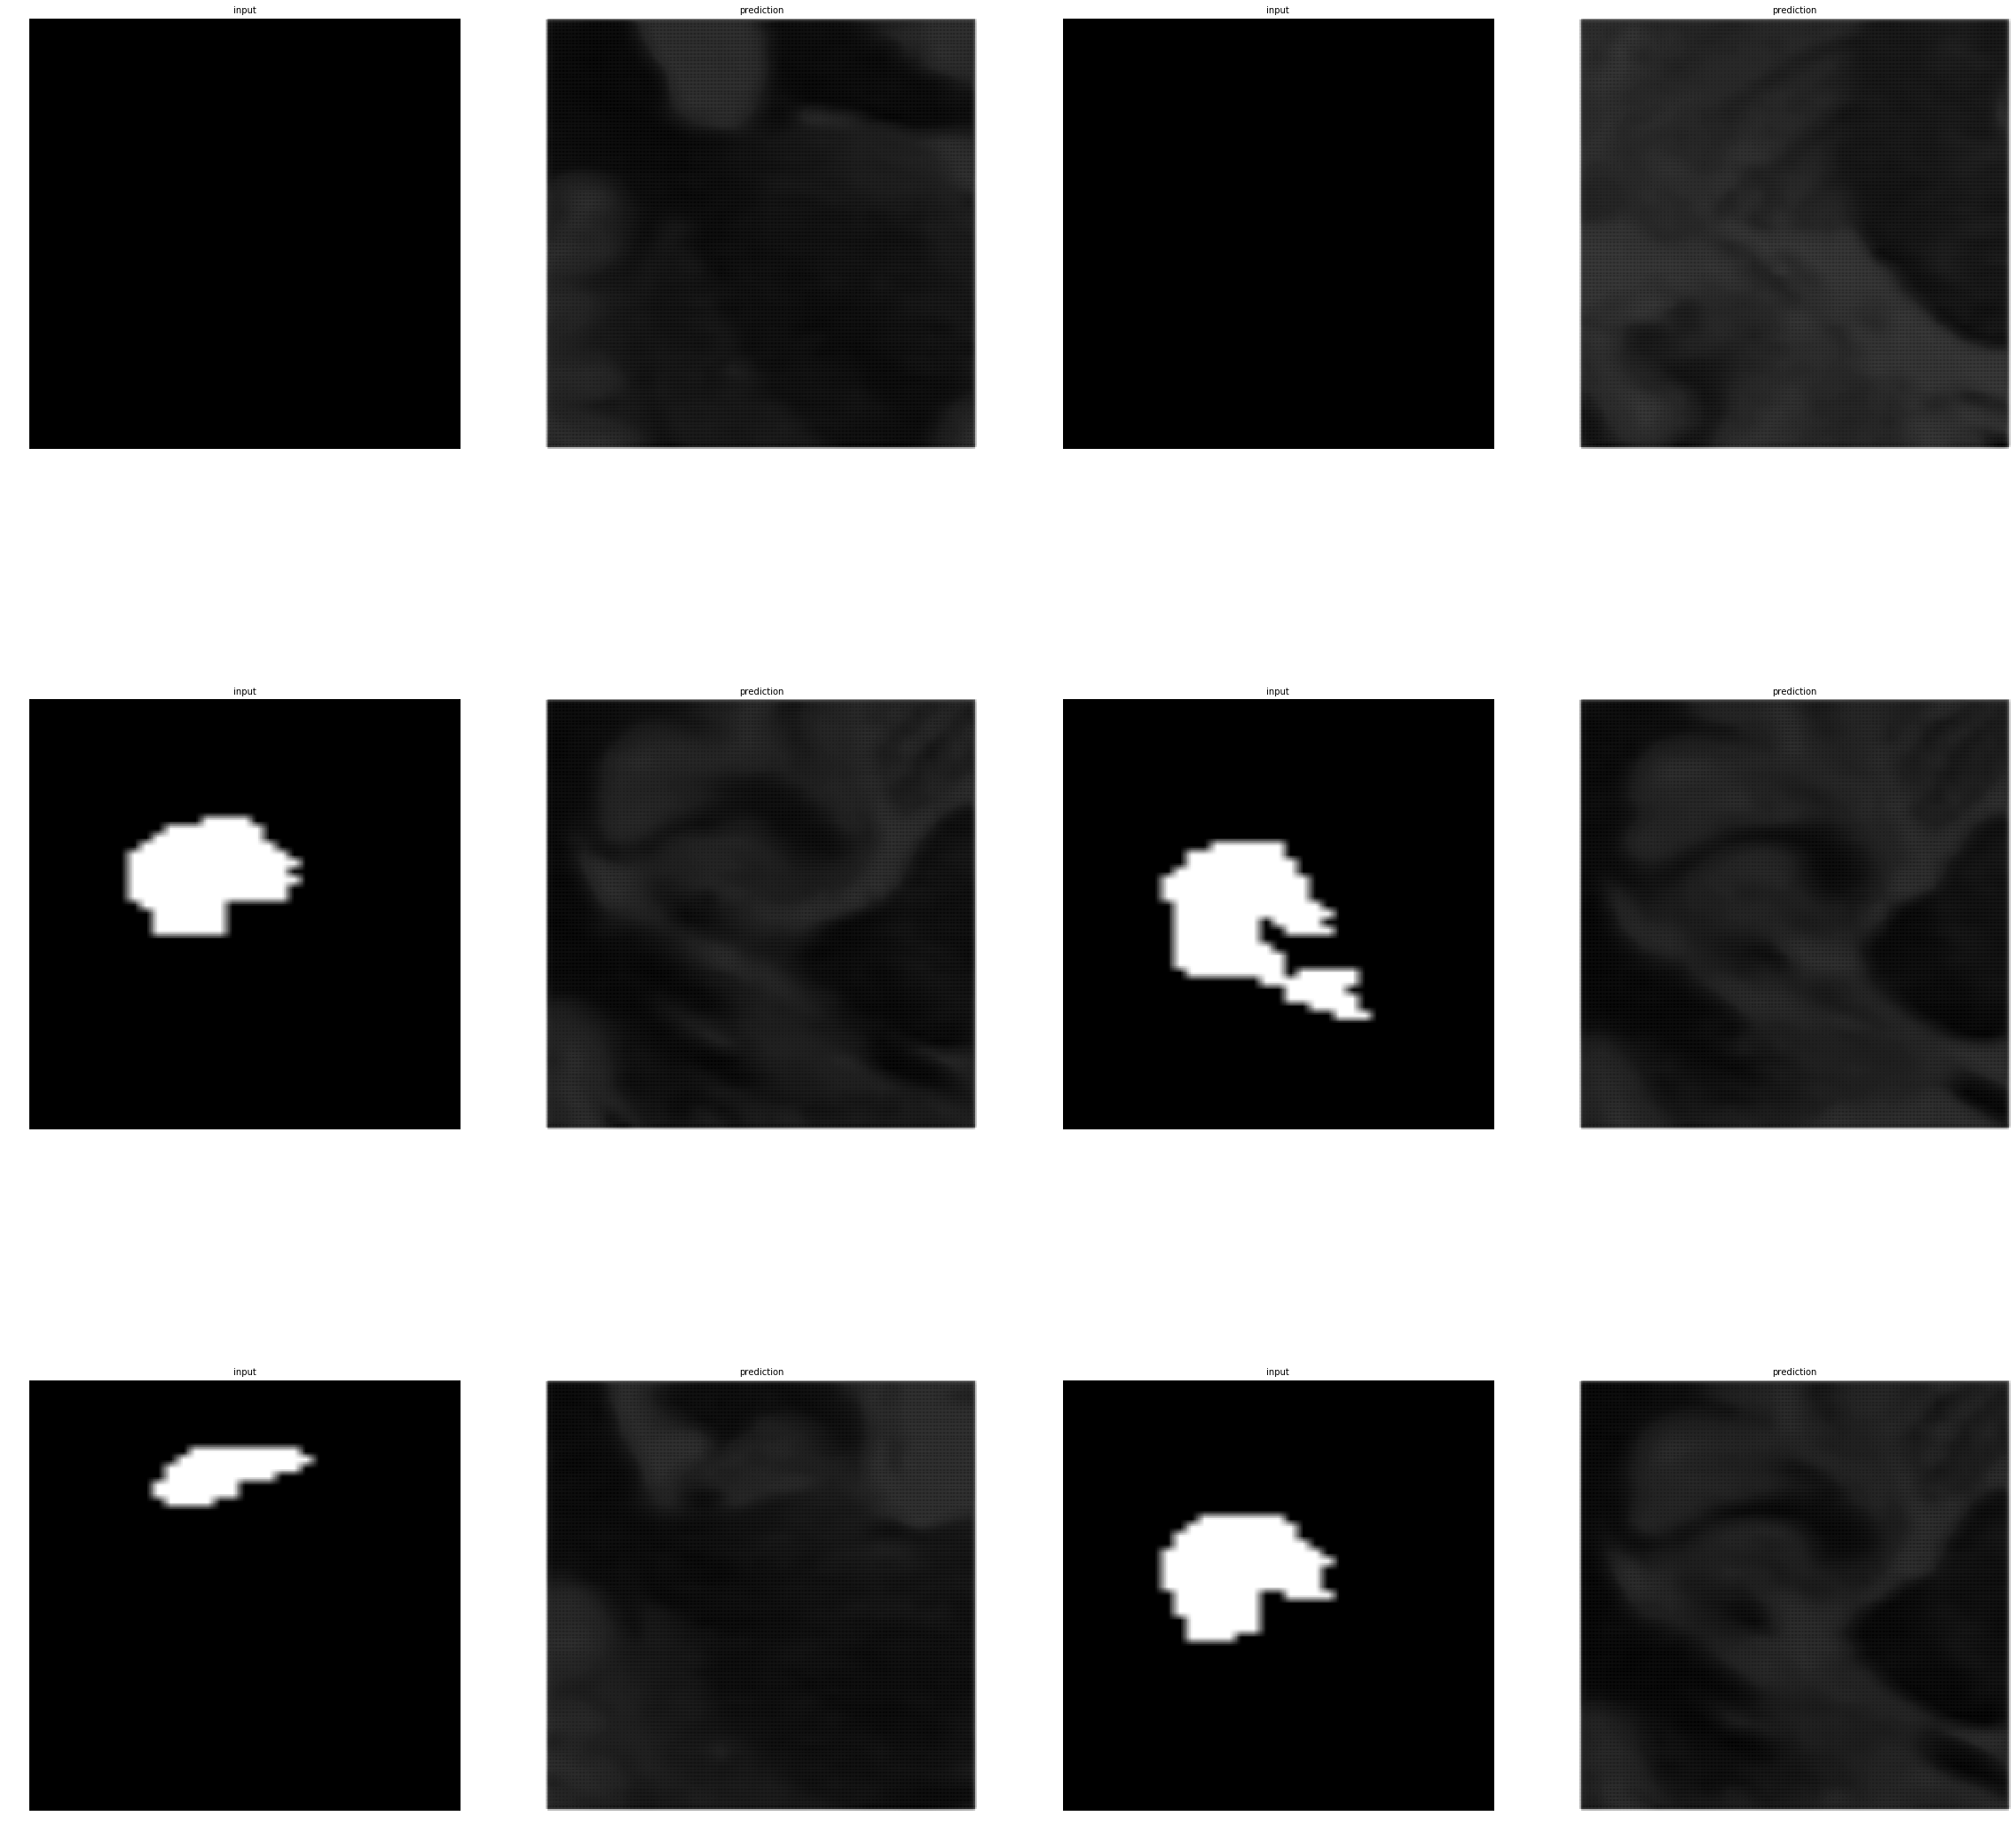

In [185]:
test()

In [135]:
def show_images(images, masks, columns=4):
    fig = plt.figure(figsize=(_figSize,_figSize))
    rows = np.ceil((images.shape[0] + masks.shape[0]) / columns)
    index = 1
    for image, mask in zip(images, masks):
        print("image shape :",image.shape,"mask shape: ",mask.shape)
        f1 = fig.add_subplot(rows, columns, index)
        f1.set_title('input', fontsize = _fontSize)
        plt.axis('off')
        plt.imshow(image,cmap = "gray")
        index += 1

        f2 = fig.add_subplot(rows, columns, index)
        f2.set_title('prediction',fontsize = _fontSize)
        plt.axis('off')
        #plt.imshow(mask.float.cpu(),cmap = "gray")
        plt.imshow(mask,cmap = "gray")
        index += 1

    plt.show()

In [133]:
device = "cpu"

images,masks = next(iter(train_loader))

In [123]:
images.shape

torch.Size([6, 3, 30, 30])

In [124]:
masks.shape

torch.Size([6, 1, 30, 30])

In [125]:
images[0][1][0]

tensor([0.3838, 0.3919, 0.3867, 0.4003, 0.4123, 0.3964, 0.3912, 0.2053, 0.0617,
        0.0493, 0.0550, 0.0430, 0.0406, 0.1196, 0.3045, 0.3689, 0.3807, 0.3807,
        0.3895, 0.3873, 0.3892, 0.3976, 0.3976, 0.3877, 0.3637, 0.2554, 0.1790,
        0.1034, 0.0336, 0.0407])

In [129]:
masks[2]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         

In [131]:
val_loader = torch.utils.data.DataLoader(
        NucleusDataset(c.data_root_dir, train=True,
                       transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                       target_transform=transforms.Compose([
                           Normalize(),
                           Rescale(_imageSize),
                           ToTensor()
                       ]),
                      mode ="val",
                      keys = _keys,
                      taskname = c.dataset_name),
        batch_size=_batchSize, shuffle=True)

root_dir : /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset  taskname :  Task01_Hippocampus
 path :  /home/ramesh/Desktop/IIITB/experiment/MedImageSegmentation/Filtereddataset/Task01_Hippocampus
 Val image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031']
 Val image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031']
 Val image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hippocampus_001_0018', 'hippocampus_001_0016', 'hippocampus_001_0031']
 Val image_names : ['hippocampus_001_0001', 'hippocampus_001_0017', 'hippocampus_001_0000', 'hippocampus_001_0025', 'hippocampus_001_0026', 'hi